**Import basic libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
digits=load_digits()
import warnings
warnings.filterwarnings("ignore")

**Read The Dataset**

In [6]:
#df has been used as the data frame name
df=pd.read_csv(r"C:\Users\Shruti Sachan\Downloads\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Check the Shape**

In [7]:
df.shape

(891, 12)

**Apply describe on the dataframe**

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Cleaning**

In [9]:
#remove the rows with missing values
df.dropna(inplace=True)
df.shape

(183, 12)

In [10]:
df.dtypes #finding the datatypes associated with each columns

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Number of Categorical and Continuous features**

In [11]:
categorical_features=df.select_dtypes(include=['object']).columns
continuous_features=df.select_dtypes(include=['int64','float64']).columns
print("categorical_features:",categorical_features)
print("The length of categorical feature:",len(categorical_features))
print("continuous_features:",continuous_features)
print("The length of continuous feature:",len(continuous_features))

categorical_features: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
The length of categorical feature: 5
continuous_features: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
The length of continuous feature: 7


**Unique value in categorical_features**

In [12]:
print("The unique values in categorical_features are:")
for i in categorical_features:
    print(i,":",df[i].nunique())

The unique values in categorical_features are:
Name : 183
Sex : 2
Ticket : 127
Cabin : 133
Embarked : 3


**Drop the Features**

In [13]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
df.shape

(183, 9)

**One Hot Encoding**

In [14]:
# It makes coulmns with all unique values in the categorical features and assigns boolean values
df=pd.get_dummies(data=df)
df.shape
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
6,7,0,1,54.0,0,0,51.8625,False,True,False,False,True
10,11,1,3,4.0,1,1,16.7000,True,False,False,False,True
11,12,1,1,58.0,0,0,26.5500,True,False,False,False,True


**Split the data into Train and Test**

In [15]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.3)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape) 

Shape of X_train: (1257, 64)
Shape of X_test: (540, 64)
Shape of y_train: (1257,)
Shape of y_test: (540,)


**Logistic Regression**

In [16]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))

0.9592592592592593


**StandardVectorClassifier**

In [17]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9888888888888889

**RandomForestClassifier**

In [18]:
rf=RandomForestClassifier(n_estimators=40)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9685185185185186

In [19]:
from sklearn.model_selection import KFold
#import KFold to split dataset into K consecutive Folds
kf=KFold(n_splits=3) #specifying the number of splits
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [20]:
for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [21]:
def get_score(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [22]:
get_score(LogisticRegression(),X_train,y_train,X_test,y_test) # getting LogisticRegression Score

0.9592592592592593

**Cross Validation Score**

In [23]:
from sklearn.model_selection import cross_val_score 
cross_val_score(LogisticRegression(),digits.data,digits.target) # computing the Cross Validation Score for respective splits

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [24]:
cross_val_score(SVC(),digits.data,digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [25]:
cross_val_score(RandomForestClassifier(n_estimators=3),digits.data,digits.target)

array([0.80277778, 0.69722222, 0.85793872, 0.84679666, 0.77994429])

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
model=SVC() #load SVC model
#hyperparameters
parameters={
    'kernel':['linear','poly','rbf','sigmoid'],
    'C':[1,5,10,20]
}

**Grid Search**

In [28]:
classifier=GridSearchCV(model,parameters,cv=5)
#fitting the data to our model
classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [29]:
classifier.cv_results_

{'mean_fit_time': array([0.04512305, 0.04765701, 0.07145152, 0.1255765 , 0.03814368,
        0.04281569, 0.0646636 , 0.06617093, 0.04161849, 0.04375029,
        0.06381049, 0.06110139, 0.03466258, 0.05043359, 0.07671022,
        0.05741553]),
 'std_fit_time': array([0.01387722, 0.00302777, 0.00339285, 0.0063803 , 0.00292828,
        0.0032328 , 0.00784714, 0.01786032, 0.00848762, 0.00626507,
        0.0021213 , 0.00821876, 0.00624137, 0.01165754, 0.01070466,
        0.00589472]),
 'mean_score_time': array([0.00620174, 0.00905209, 0.03782649, 0.03153572, 0.00802946,
        0.00639963, 0.03449464, 0.01572976, 0.00871263, 0.01262803,
        0.0319973 , 0.02218895, 0.00312238, 0.00938058, 0.03890448,
        0.01809473]),
 'std_score_time': array([0.00561238, 0.00506519, 0.00538474, 0.00360886, 0.00428777,
        0.0041738 , 0.0065071 , 0.00027057, 0.00721738, 0.00594647,
        0.00170357, 0.00742755, 0.00624475, 0.00765921, 0.00631066,
        0.00677915]),
 'param_C': masked_array(d

In [30]:
#best parameters
best_parameters=classifier.best_params_
print(best_parameters)

{'C': 5, 'kernel': 'rbf'}


In [31]:
#highest accuracy
highest_accuracy=classifier.best_score_
print(highest_accuracy)

0.9872604818819959


In [32]:
#loading the results to pandas dataframe
results=pd.DataFrame(classifier.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.045123,0.013877,0.006202,0.005612,1,linear,"{'C': 1, 'kernel': 'linear'}",0.984127,0.980159,0.976096,0.972112,0.960159,0.974530,0.008229,9
1,0.047657,0.003028,0.009052,0.005065,1,poly,"{'C': 1, 'kernel': 'poly'}",0.988095,0.992063,0.984064,0.988048,0.976096,0.985673,0.005416,8
2,0.071452,0.003393,0.037826,0.005385,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.988095,0.996032,0.984064,0.988048,0.976096,0.986467,0.006480,4
3,0.125576,0.006380,0.031536,0.003609,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.904762,0.920635,0.888446,0.896414,0.880478,0.898147,0.013847,13
4,0.038144,0.002928,0.008029,0.004288,5,linear,"{'C': 5, 'kernel': 'linear'}",0.984127,0.980159,0.976096,0.972112,0.960159,0.974530,0.008229,9


In [33]:
grid_search_results=results[['param_C','param_kernel','mean_test_score']]
grid_search_results

,param_C,param_kernel,mean_test_score
0,1,linear,0.974530
1,1,poly,0.985673
2,1,rbf,0.986467
3,1,sigmoid,0.898147
4,5,linear,0.974530
5,5,poly,0.986467
6,5,rbf,0.987260
7,5,sigmoid,0.846418
8,10,linear,0.974530
9,10,poly,0.986467


**RandomizedSearchCV**

In [34]:
#loading the model SVC for RandomizedSearchCV
model=SVC()
#hyperparameters
parameters={
    'kernel':['linear','poly','rbf','sigmoid'],
    'C':[1,5,10,20]
}

In [35]:
from sklearn.model_selection import RandomizedSearchCV
classifier=RandomizedSearchCV(model,parameters,cv=5)
#fit the data to the model
classifier.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [36]:
classifier.cv_results_

{'mean_fit_time': array([0.04440112, 0.04849873, 0.07039051, 0.05089631, 0.06235981,
        0.05495992, 0.04999027, 0.07892518, 0.04124107, 0.06329837]),
 'std_fit_time': array([0.00785538, 0.00732311, 0.0026339 , 0.00148352, 0.00643345,
        0.00441332, 0.00108306, 0.00915777, 0.01062362, 0.00311681]),
 'mean_score_time': array([0.01250525, 0.01664376, 0.02319312, 0.01343861, 0.01986046,
        0.01186934, 0.01121154, 0.0230751 , 0.00997248, 0.03739185]),
 'std_score_time': array([0.00305397, 0.00274563, 0.0040911 , 0.00463395, 0.00322114,
        0.00572583, 0.00640847, 0.00596959, 0.00236482, 0.00337011]),
 'param_kernel': masked_array(data=['linear', 'linear', 'sigmoid', 'poly', 'sigmoid',
                    'poly', 'poly', 'sigmoid', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[1, 20, 10, 10, 20, 5, 20, 5, 10, 

In [37]:
#best parameters
best_parameters=classifier.best_params_
print(best_parameters)

{'kernel': 'rbf', 'C': 5}


In [38]:
#highest accuracy
highest_accuracy=classifier.best_score_
print(highest_accuracy)

0.9872604818819959


In [39]:
#loading the results to the dataframe
results=pd.DataFrame(classifier.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044401,0.007855,0.012505,0.003054,linear,1,"{'kernel': 'linear', 'C': 1}",0.984127,0.980159,0.976096,0.972112,0.960159,0.974530,0.008229,5
1,0.048499,0.007323,0.016644,0.002746,linear,20,"{'kernel': 'linear', 'C': 20}",0.984127,0.980159,0.976096,0.972112,0.960159,0.974530,0.008229,5
2,0.070391,0.002634,0.023193,0.004091,sigmoid,10,"{'kernel': 'sigmoid', 'C': 10}",0.821429,0.845238,0.792829,0.812749,0.788845,0.812218,0.020483,9
3,0.050896,0.001484,0.013439,0.004634,poly,10,"{'kernel': 'poly', 'C': 10}",0.992063,0.992063,0.984064,0.988048,0.976096,0.986467,0.005975,2
4,0.062360,0.006433,0.019860,0.003221,sigmoid,20,"{'kernel': 'sigmoid', 'C': 20}",0.829365,0.821429,0.792829,0.788845,0.780876,0.802669,0.019118,10


In [40]:
random_search_results=results[['param_kernel','param_C','mean_test_score']]
random_search_results

,param_kernel,param_C,mean_test_score
0,linear,1,0.974530
1,linear,20,0.974530
2,sigmoid,10,0.812218
3,poly,10,0.986467
4,sigmoid,20,0.802669
5,poly,5,0.986467
6,poly,20,0.986467
7,sigmoid,5,0.846418
8,linear,10,0.974530
9,rbf,5,0.987260


In [41]:
len(X_test)

540

In [42]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=40)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [43]:
model.score(X_test,y_test)

0.9796296296296296

In [44]:
y_predicted=model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 61,  0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 51,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  1,  1,  1,  0,  1,  0,  0, 45,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 51]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

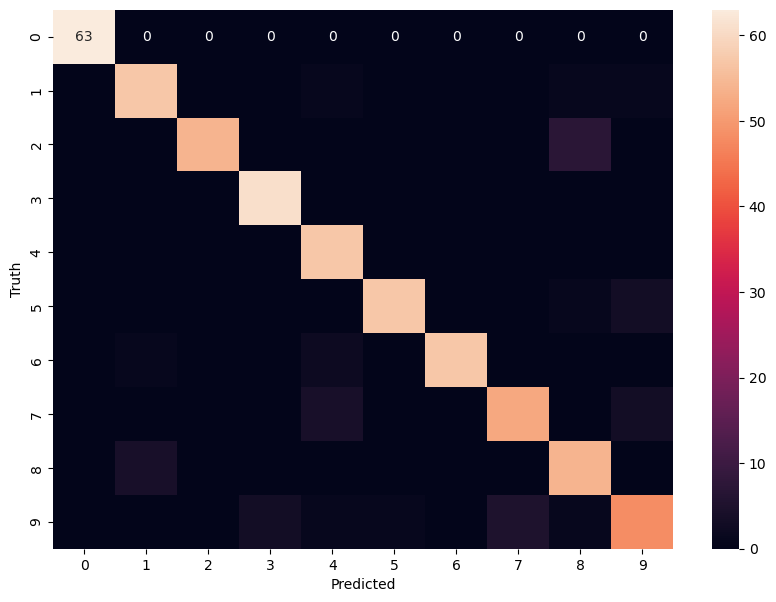

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Implementing Decision Tree Classifier**

In [162]:
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.3)
m=DecisionTreeClassifier(random_state=42)
#Train DecisionTreeClassifier
mo=m.fit(X_train,y_train)
#predict the response for testdata
y_pred=m.predict(X_test)
from sklearn.metrics import accuracy_score
print("model accuracy score:",accuracy_score(y_test,y_pred))

model accuracy score: 0.8666666666666667


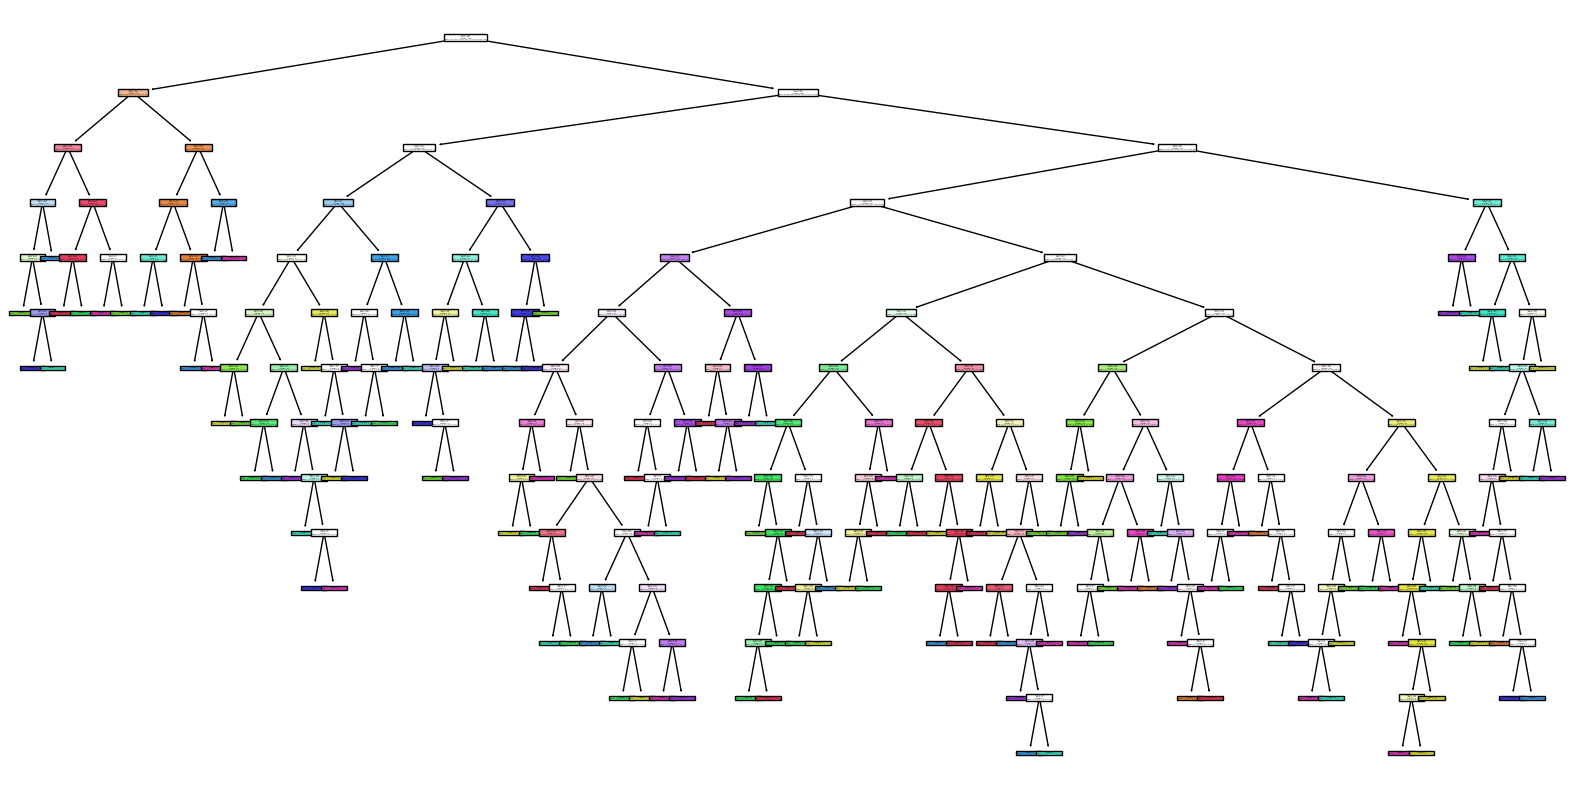

In [170]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(m, filled=True)
plt.show()

**Build Adaboost model**

In [155]:
from sklearn.ensemble import AdaBoostClassifier
#create adaboost classifier object
abc=AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=0)
#Train AdaBoost Classifier
model1=abc.fit(X_train,y_train)
#predict the response for test data
y_pred=model1.predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score
print("model accuracy score:",accuracy_score(y_test,y_pred))

model accuracy score: 0.25555555555555554


In [163]:
pip install xgboost

  Using cached xgboost-2.1.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.0-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.


**Build XGBoost model**

In [171]:
from xgboost import XGBClassifier
#create XG classifier object
abc=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
#Train XGBoost Classifier
model3=abc.fit(X_train,y_train)
#predict the response for test data
y_pred=model3.predict(X_test)

In [172]:
from sklearn.metrics import accuracy_score
print("model accuracy score:",accuracy_score(y_test,y_pred))

model accuracy score: 0.9740740740740741


**Evaluation with SVC base estimator**

In [114]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC(probability=True,kernel='linear')
abc=AdaBoostClassifier(n_estimators=50,base_estimator=svc,learning_rate=1,random_state=0)
model2=abc.fit(X_train,y_train)#train adaboost classifier
y_pred=model2.predict(X_test)#predict the response for test dataset
#calculate model accuracy with SVC base estimator
print("Model Accuracy with SVC Base estimator:",accuracy_score(y_test,y_pred))


Model Accuracy with SVC Base estimator: 0.9348914858096828


**Training the KNN Model on the training dataset**

In [119]:
from sklearn.neighbors import KNeighborsClassifier
X=df.iloc[:,[2,3]].values
y=df.iloc[:,-1].values
#splitting into training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
#predicting the Test set results
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)

In [120]:
print("the confusion matrix is:",cm)
print("the accuracy score is:",ac)

the confusion matrix is: [[11 13]
 [ 5 26]]
the accuracy score is: 0.6727272727272727


In [160]:
pip install lightgbm

  Using cached lightgbm-4.4.0-py3-none-win_amd64.whl.metadata (19 kB)
Using cached lightgbm-4.4.0-py3-none-win_amd64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


**Implementing the lightbgm Classifier**

In [46]:
#splitting of datasets
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.3)
#built the lightbgm model
import lightgbm as lgb
clf=lgb.LGBMClassifier()
clf.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 1257, number of used features: 53
[LightGBM] [Info] Start training from score -2.308169
[LightGBM] [Info] Start training from score -2.261286
[LightGBM] [Info] Start training from score -2.357360
[LightGBM] [Info] Start training from score -2.253681
[LightGBM] [Info] Start training from score -2.261286
[LightGBM] [Info] Start training from score -2.261286
[LightGBM] [Info] Start training from score -2.308169
[LightGBM] [Info] Start training from score -2.292296
[LightGBM] [Info] Start training from score -2.400285
[LightGBM] [Info] Start training from score -2.332462
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

LGBMClassifier()

**Model Prediction**

In [47]:
# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
# Make predictions on the testing set
y_pred = clf.predict(X_test)
#View accuracy score
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print('LightGBM model accuracy score: {0:0.3f}'.format(accuracy_score(y_test,y_pred)))

LightGBM model accuracy score: 0.969


**Compare Train and Test set accuracy**

In [48]:
y_pred_train=clf.predict(X_train)
print('Training set accuracy score:{0:0.4f}'.format(accuracy_score(y_train,y_pred_train)))

Training set accuracy score:1.0000


**Check for Overfitting**

In [49]:
#print the scores of training and test data set
print('Training set score:{0:0.4}'.format(clf.score(X_train,y_train)))
print('Test set score:{0:0.4}'.format(clf.score(X_test,y_test)))

Training set score:1.0
Test set score:0.9685


**Confusion Matrix**

In [50]:
#view Confusion matrix
#slice into four pieces
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix:',cm)
print('True positives:',cm[0,0])
print('True negatives:',cm[1,1])
print('False positives:',cm[0,1])
print('False negatives:',cm[1,0])

Confusion matrix: [[52  0  0  0  1  0  0  0  0  0]
 [ 0 51  0  0  0  0  0  0  0  0]
 [ 0  1 57  0  0  0  0  0  0  0]
 [ 0  0  2 47  0  2  0  0  0  0]
 [ 0  0  0  0 48  0  0  2  0  0]
 [ 0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  1  0  1 54  0  0  0]
 [ 0  0  0  0  0  0  0 52  0  0]
 [ 0  5  0  0  0  0  0  0 55  0]
 [ 1  0  0  0  0  0  0  0  1 56]]
True positives: 52
True negatives: 51
False positives: 0
False negatives: 0


**Classification Metrices**

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.89      1.00      0.94        51
           2       0.97      0.98      0.97        58
           3       0.98      0.92      0.95        51
           4       0.98      0.96      0.97        50
           5       0.94      1.00      0.97        51
           6       1.00      0.96      0.98        56
           7       0.96      1.00      0.98        52
           8       0.98      0.92      0.95        60
           9       1.00      0.97      0.98        58

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

